# CP321 Project
Jamie Beatty: 169027003, Anna Doneva: 169042350, Gracie Heer: 169034824

# Introduction
With the exponential growth of the internet in the past two decades, it is now possible for anyone to post content online from anywhere in the world. Thus it comes as no surprise that the most popular platform for content creation, YouTube, has propelled into the forefront of digital culture. It has become so popular that people have made careers out of posting videos on the platform. Our data visualization project aims to answer the overall question: How does one create a successful youtube channel? Metrics of success for youtube channels include subscriber counts, weekly views, and total views. Using a dataset of over one million youtube channels, we will visualize relationships between relevant variables such as subscriber count, weekly upload counts, and the youtuber place of origin to envision the answer to our proposed question. 

# Data Description
The dataset comprises essential variables pertinent to YouTube channel analytics. It includes:
- channel_id: Unique identifier for each YouTube channel.
- channel_link: URL link to the channel's homepage.
- channel_name: Name or title of the YouTube channel.
- subscriber_count: Number of subscribers to the channel.
- banner_link: URL link to the channel's banner image.
- description: Description or bio provided by the channel creator.
- keywords: Keywords associated with the channel's content.
- avatar: URL link to the channel's avatar or profile picture.
- country: Country of origin for the channel.
- total_views: Total number of views accumulated by the channel.
- total_videos: Total count of videos uploaded to the channel.
- join_date: Date when the channel was created or joined YouTube.
- mean_views_last_30_videos: Mean views garnered by the last 30 videos uploaded.
- median_views_last_30_videos: Median views achieved by the last 30 videos uploaded.
- std_views_last_30_videos: Standard deviation of views among the last 30 videos uploaded.
- videos_per_week: Average number of videos uploaded per week by the channel.


### Import Packages

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import seaborn as sns
from scipy.stats import mstats
import matplotlib.ticker as ticker
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

In [48]:
# Link to dataset https://www.kaggle.com/datasets/asaniczka/2024-youtube-channels-1-million/data
youtube = pd.read_csv("youtube.csv")
youtube.head(5)

,channel_id,channel_link,channel_name,subscriber_count,banner_link,description,keywords,avatar,country,total_views,total_videos,join_date,mean_views_last_30_videos,median_views_last_30_videos,std_views_last_30_videos,videos_per_week
0,UCUMHFa347GD8EIRaVVuxR8Q,/@TonettaClay,Tonetta Clay,781,https://yt3.googleusercontent.com/bj2C0MOj3SMi...,My name is Tonetta or Toni for short and I'm d...,NaN,https://yt3.googleusercontent.com/cUmKB4Zet1SX...,NaN,227567.0,1984.0,2015-12-08,10.866667,6.5,13.922963,1.50
1,UC28mqg7IlYWEhrZwHb72IQA,/@FoodnHappinessVeena,Food 'n' Happiness,0,NaN,"Hello viewers.\n I am Veena from Mangalore, Ka...","food n happiness, food and happiness, food, Fo...",https://yt3.googleusercontent.com/lY_u-8bLWNgA...,India,592961.0,158.0,2020-05-08,1448.066667,1510.0,869.364401,0.00
2,UCoLwWY9zQ7Jp8aDtYUszmYg,/@TimShieff,Tim Shieff,166000,https://yt3.googleusercontent.com/2KC8Lj8RF3uF...,The journey of rediscovery.\n\nhttps://rdscvr.com,"Tim, shieff, timothy, health, human, spiritual...",https://yt3.googleusercontent.com/-aNZLP23AnkX...,United Kingdom,27250763.0,372.0,2006-03-19,5456.933333,3430.0,4322.803149,0.00
3,UCAQOeJwsgBMC74-OjjcQcJA,/@JerryAndJulieMusic,Jerry & Julie Music,1090,https://yt3.googleusercontent.com/dI6Oq0iOhx-c...,Welcome to Jerry & Julie Music. We hope you w...,"jerryandjuliemusic, jerryspianobar, juliesguit...",https://yt3.googleusercontent.com/c41pe3_aA75h...,United States,339906.0,913.0,2010-03-27,75.966667,47.5,113.374448,4.00
4,UCOqwGhI1AmpWwxMYw9D_fqw,/@KichuandYugiMagizhakam,Kichu and Yugi Magizhakam,1160,https://yt3.googleusercontent.com/CXrATV8NKPRg...,Hi friends welcome to my channel...I'm Devi mo...,NaN,https://yt3.googleusercontent.com/FDA5pc1ZQ5jT...,NaN,288328.0,476.0,2023-12-21,85.700000,66.0,72.032007,1.25


In [37]:
# Finding the size of the data
youtube.shape

(1095242, 16)

# Heat Map
With so many variables to choose from, we thought it would be best to identify important relationships among quantitative variables in our data pertaining to subscriber count, video count, and view counts. We decided to use a heatmap to visualize the correlations in order to know which relationships would be important to our analysis. 

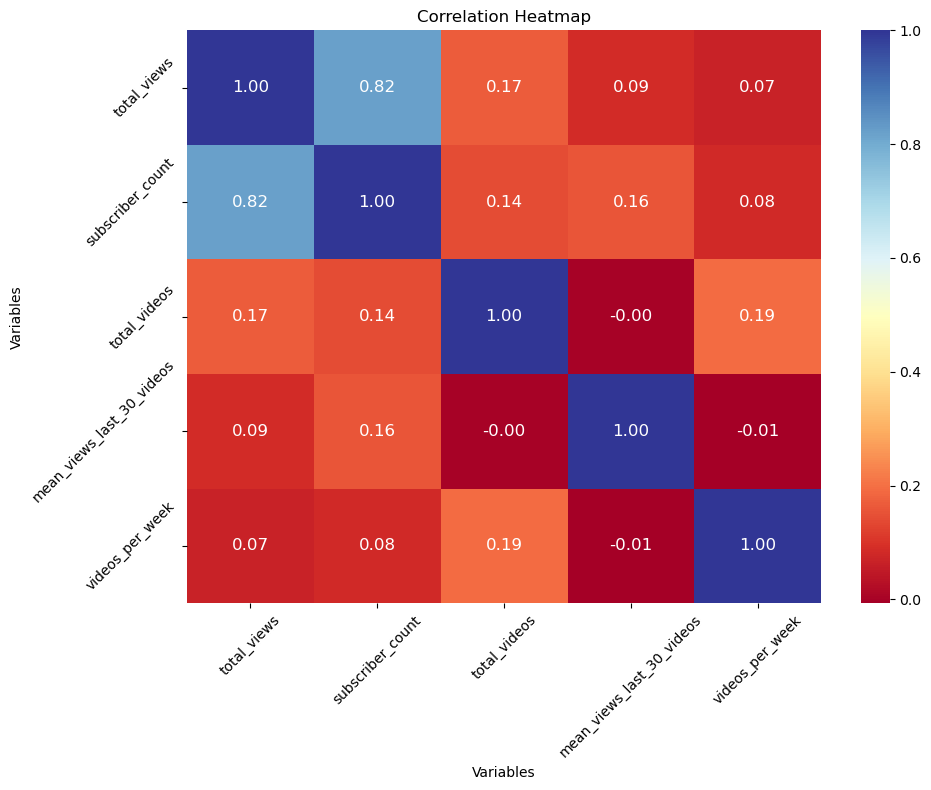

In [44]:
# Select relevant columns
selected_columns = ['total_views', 'subscriber_count', 'total_videos', 'mean_views_last_30_videos', 'videos_per_week']
data = youtube[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis of the Heat Map
The correlations between view_count and subscriber counts are high but ultimately trivial, as they don’t reveal information on how either can be increased. Every other relationship has a very low correlation, however we thought we could gain some insight by exploring the relationship between videos_per_week and subscriber count.

# Box Plot
Next, we wanted to investigate the relationship between videos_per_week and subscriber count. Our speculation was that a higher number of videos per week would result in a higher subscriber count.

In [41]:
# Making a sample of the data
practice = youtube.sample(n=10000)

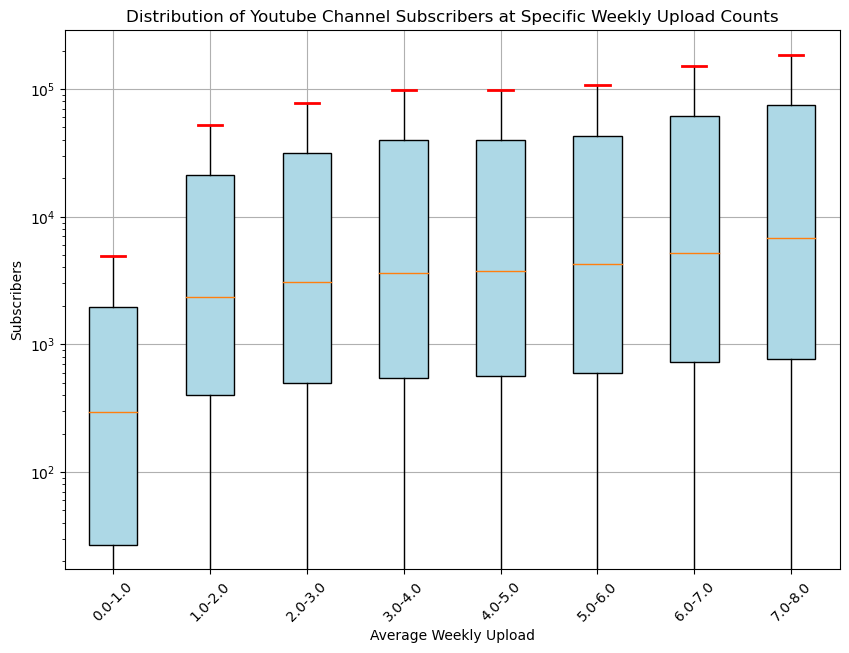

In [50]:
# Define the bin edges for weekly upload counts
bin_edges = np.arange(0.0, 8.5, 1)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 7))

# Create boxplots
boxplot = ax.boxplot([youtube[youtube['videos_per_week'].between(bin_start, bin_end)]['subscriber_count'] for bin_start, bin_end in zip(bin_edges[:-1], bin_edges[1:])], 
                     positions=np.arange(len(bin_edges)-1), patch_artist=True,showfliers = False,capprops = dict(color = "red", linewidth = 2), boxprops = dict(facecolor = "lightblue"))

# Add labels and title
ax.set_xlabel('Average Weekly Upload')
ax.set_ylabel('Subscribers')
ax.set_title('Distribution of Youtube Channel Subscribers at Specific Weekly Upload Counts')
ax.set_xticklabels([f'{bin_start}-{bin_end}' for bin_start, bin_end in zip(bin_edges[:-1], bin_edges[1:])], rotation=45)


# Set logarithmic scale for y-axis
ax.set_yscale('log')

plt.grid(True)
plt.show()

## Analysis of the Box Plot
We used boxplots to visualize the spread of subscribers at different weekly upload counts. Since the range of subscribers was high, we used a logarithmic scale. On the x-axis, the average weekly upload categories include values from and including the left-most value, up to and not including the rightmost value. We found that overall, the number of subscribers does tend to increase as average weekly upload increases. Additionally, the range of subscribers for each upload count value also increases, as indicated by the red cap value of each boxplot. So although uploading more videos can result in a successful YouTube, there are a considerable number of YouTube channels that upload videos multiple times per week that do not become successful.

# Chloropleth Map
Here we created a chorlopleth map to plot the differences in number of channels per country.

### Finding differences in the Country Names
There were differences in the names of some of the countries, so using this code I was able to see which were different, and using the replace function, changed them appropriately.

In [26]:
unique_country = youtube["country"].unique()
#print(unique_country)
countries_list = world['name'].tolist()
#print(countries_list)

### Creating the Map

C:\Users\jpmbe\AppData\Local\Temp\ipykernel_7520\2284741930.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


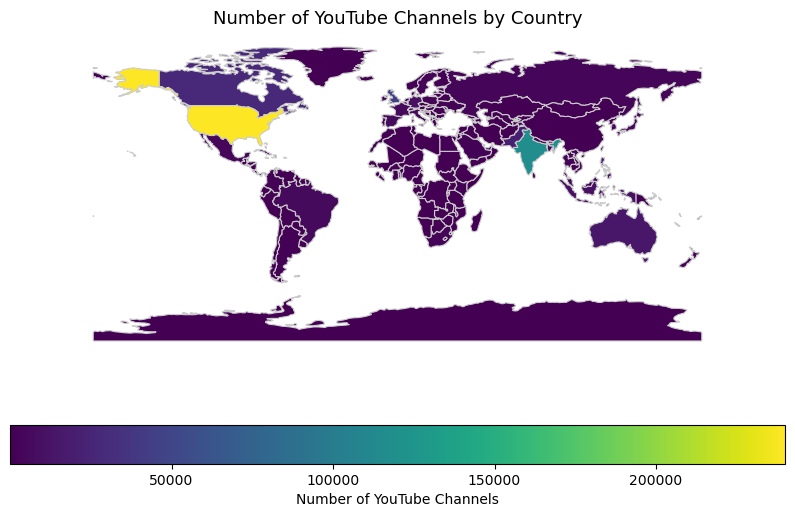

In [34]:
# Step 1: Group data by country and count the number of channels
country_counts = youtube.groupby('country').size().reset_index(name='channel_count')

# Step 2: Read world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Step 3: Modify country names in the shapefile
# Replace country names in the GeoDataFrame
world.replace({'United States of America': 'United States',
               'United States': 'Myanmar (Burma)',
               'Trinidad and Tobago': 'Trinidad & Tobago',
               'Congo': 'Congo - Brazzaville',
               'Dem. Rep. Congo': 'Congo - Kinshasa',
               'Falkland Is.': 'Falkland Islands (Islas Malvinas)',
               'W. Sahara': 'Western Sahara',
               'N. Cyprus': 'Northern Cyprus',
               'Bosnia and Herz.': 'Bosnia & Herzegovina',
               'eSwatini': 'Eswatini',
               'Côte d\'Ivoire': 'Ivory Coast',
               'Eq. Guinea': 'Equatorial Guinea',
               'S. Sudan': 'South Sudan'}, inplace=True)

# Step 4: Merge shapefile data with channel counts data
world = world.merge(country_counts, how='left', left_on='name', right_on='country')

# Step 5: Plot the merged data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot the world map with a color scale and label
world.plot(column='channel_count', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
           legend_kwds={'label': "Number of YouTube Channels", 'orientation': 'horizontal'})
# Add a title
plt.title('Number of YouTube Channels by Country', size = 13)

# Remove axis
ax.axis('off')

# Show the plot
plt.show()

## Explanation of the Chloropleth Map Visualization
Here we created a map displaying the distribution of youtube channels in comparison to their country of origin. The blank countries are this way because there was no data for that country in the data set, or a difference in the naming of them was missed. Overall, most countries has a low number of youtube channels, with the majority of them being a dark purple. Some outliers of this trend is the USA, the country with the highest amount of channels, in yellow. The UK and Canada are a dark blue and India a teal (even more channels). This tells us that the majority of youtube channels are from this country, and therefore the country with the widest audience is the USA.

# Word Cloud
We created a word cloud of the most popular keywords of channels with over 200,000 subscribers.

C:\Users\jpmbe\AppData\Local\Temp\ipykernel_7520\1331326774.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].fillna('')
C:\Users\jpmbe\AppData\Local\Temp\ipykernel_7520\1331326774.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['channel_name'] = df['channel_name'].fillna('')


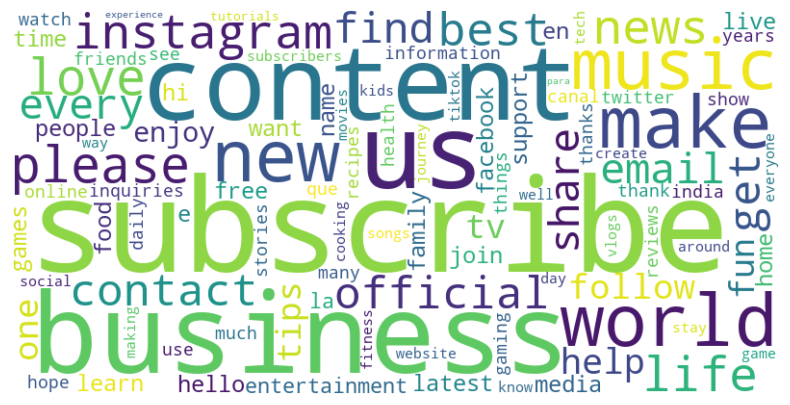

In [47]:
# Load the dataset
df = youtube

# Convert 'subscriber_count' to numeric, errors='coerce' will turn non-numeric values into NaN
df['subscriber_count'] = pd.to_numeric(df['subscriber_count'], errors='coerce')

# Filter channels with more than 200000 subscribers
df = df[df['subscriber_count'] > 200000]  

# Handle NaN values in 'description' and 'channel_name' columns
df['description'] = df['description'].fillna('')
df['channel_name'] = df['channel_name'].fillna('')

# Concatenate channel descriptions and titles
text_data = ' '.join(df['description'] + ' ' + df['channel_name'])

# Convert text to lowercase
text_data = text_data.lower()

# Tokenize text 
tokens = word_tokenize(text_data)

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

# Remove punctuation and symbols
tokens = [token for token in tokens if token.isalnum()]

# Remove specific words
specific_words = ['welcome', 'https', 'http', 'youtube', 'channel', 'also', 'like', 'buseiness', 'de', 'video', 'videos']
tokens = [token for token in tokens if token not in specific_words]

# Perform frequency analysis
freq = Counter(tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Explanation of the Word Cloud
Another key aspect of youtube channel success is the type of content the youtube channel creator decides to put out. This word map tells us the most common key words of popular youtube channels. Some don't tell us much, like subscribe and content, but words like games, life, music and business tell us the types of channels that becomes popular. For example, if business is a very popular word, considering a business youtube channel is a good idea because many of them become popular. Games, news, music, and other words describing the type of youtube channel inform us on which types are the most successful. Another finding is that there are references to other social media, including instagram and facebook, so you should link those in the description of your youtube channel.

# Conclusion
In conclusion, there are many different factors associated with creating a successful YouTube channel. Many channels are from the USA and India, but this alone won't guarantee success. There were low correlations between the variables (total_views, subscriber_count, total_videos, mean_views_last_30_videos, videos_per_week), so we weren't able to find much information from the Heat Map, but from the box plot we found that uploading more videos per week increased your chances of having more subscribers. However, even with this there are a considerable number of YouTube channels that upload videos multiple times per week that do not become successful. The Word Cloud told us that having a business focused channel is common among the most popular YouTubers, and other types including music and news channels have also had success. In the end, there are many more variables associated with sucessful channels and we want to continue to research these. 